In [1]:
# General package imports

import pandas as pd
import numpy as np
import time

print('Imports completed successfully')

Imports completed successfully


In [2]:
url = 'https://raw.githubusercontent.com/djlittle/Homelessness_Clustering_Comparisons/master/Data/HMIS%20Data%20Extract.csv'

dat = pd.read_csv(url) # Importing data

print(dat.head())

   personalid  projecttype_1_bednights  projecttype_1_count  \
0         342                     91.0                  4.0   
1         401                      2.0                  2.0   
2         402                      NaN                  NaN   
3         424                      5.0                  5.0   
4         438                    220.0                199.0   

   projecttype_2_count  projecttype_3_count  projecttype_4_count  \
0                  NaN                  NaN                  NaN   
1                  NaN                  1.0                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  1.0   

   projecttype_6_count  projecttype_7_count  projecttype_8_count  \
0                  NaN                  2.0                  NaN   
1                  1.0                  1.0                  NaN   
2       

In [3]:

# Dataframe manipulation and nan handling

processing_times = pd.DataFrame()  # For assessing each algorithm's processing times

df = dat.iloc[:, 1:]
df.fillna(0, inplace=True) # Filling null values of the data frame with -1. 
# Other approaches to null handling are also of interest here.

print(df.head())

   projecttype_1_bednights  projecttype_1_count  projecttype_2_count  \
0                     91.0                  4.0                  0.0   
1                      2.0                  2.0                  0.0   
2                      0.0                  0.0                  0.0   
3                      5.0                  5.0                  0.0   
4                    220.0                199.0                  0.0   

   projecttype_3_count  projecttype_4_count  projecttype_6_count  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  1.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  1.0   
4                  0.0                  1.0                  2.0   

   projecttype_7_count  projecttype_8_count  projecttype_10_count  \
0                  2.0                  0.0                   0.0   
1                  1

In [4]:
# Kmeans 

from sklearn.cluster import KMeans

start = time.time()
kmeans = KMeans(n_clusters=10, verbose=True).fit(df) # Model fitting
kmeans_labels = kmeans.labels_ + 1  # Label assignment
end = time.time()

processing_times['kmeans'] = [(end - start)] # Computing processing time

dat['kmeans'] = kmeans_labels # Attaching labels to original dataframe

print('Kmeans model complete')
print('Processing time: '+ str(processing_times['kmeans'][0]) + ' seconds')
     

Initialization complete
Iteration 0, inertia 2612941.0
Iteration 1, inertia 2374186.938283117
Iteration 2, inertia 2340530.4414374847
Iteration 3, inertia 2321686.461448122
Iteration 4, inertia 2308898.122388003
Iteration 5, inertia 2296695.7013488924
Iteration 6, inertia 2287805.5963278837
Iteration 7, inertia 2272051.2414504914
Iteration 8, inertia 2255626.1055353708
Iteration 9, inertia 2245154.2177489423
Iteration 10, inertia 2235241.3080582237
Iteration 11, inertia 2227555.462311367
Iteration 12, inertia 2218289.399965343
Iteration 13, inertia 2195098.2209785073
Iteration 14, inertia 2162728.504435858
Iteration 15, inertia 2120256.425743005
Iteration 16, inertia 2074307.3536803597
Iteration 17, inertia 2041848.560978191
Iteration 18, inertia 2021270.524198289
Iteration 19, inertia 1998698.4544390389
Iteration 20, inertia 1971698.7532092584
Iteration 21, inertia 1933815.8931755214
Iteration 22, inertia 1905537.3726439478
Iteration 23, inertia 1884766.4645904917
Iteration 24, inerti

In [9]:
# DBSCAN 

from sklearn.cluster import DBSCAN

start = time.time()
dbscan = DBSCAN(eps=2.5, min_samples=10).fit(df) # Model fitting
dbscan_labels = dbscan.labels_ + 1 # Label assignment
end = time.time()

processing_times['dbscan'] = [(end - start)] # Computing processing time

dat['dbscan'] = dbscan_labels # Attaching labels to original dataframe

print('DBSCAN model complete')
print('Processing time: '+ str(processing_times['dbscan'][0]) + ' seconds')

DBSCAN model complete
Processing time: 15.308066129684448 seconds


In [11]:
# Birch algorithm

from sklearn.cluster import Birch

start = time.time()
birch = Birch(branching_factor=1000, n_clusters=10, threshold=1.5).fit(df) # Model fitting
birch_labels = birch.labels_+1 # Label assignment
end = time.time()

processing_times['birch'] = [(end - start)] # Computing processing time

dat['birch'] = birch_labels # Attaching labels to original dataframe

print('BIRCH model complete')
print('Processing time: '+ str(processing_times['birch'][0]) + ' seconds')

BIRCH model complete
Processing time: 1.3186252117156982 seconds


In [12]:

# Comparing clusters

print(processing_times) # Print of vector containing process times

unique, counts = np.unique(kmeans_labels, return_counts=True) # Returning counts of each cluster 
kmeans_clusters = dict(zip(unique, counts)) # Organizing counts
print(kmeans_clusters)  # Output to user 

unique, counts = np.unique(dbscan_labels, return_counts=True)
dbscan_clusters = dict(zip(unique, counts))
print(dbscan_clusters)

unique, counts = np.unique(birch_labels, return_counts=True)
birch_clusters = dict(zip(unique, counts))
print(birch_clusters)

     kmeans     dbscan     birch
0  0.563819  15.308066  1.318625
{1: 22815, 2: 471, 3: 1483, 4: 58, 5: 1041, 6: 299, 7: 100, 8: 1946, 9: 52, 10: 1080}
{0: 988, 1: 28104, 2: 17, 3: 15, 4: 103, 5: 31, 6: 19, 7: 35, 8: 10, 9: 11, 10: 12}
{1: 2048, 2: 200, 3: 25214, 4: 1234, 5: 37, 6: 41, 7: 48, 8: 449, 9: 57, 10: 17}


Beginning k = 2
Beginning k = 3
Beginning k = 4
Beginning k = 5
Beginning k = 6
Beginning k = 7
Beginning k = 8
Beginning k = 9
Beginning k = 10
Beginning k = 11
Beginning k = 12
Beginning k = 13
Beginning k = 14
Beginning k = 15
Beginning k = 16
Beginning k = 17
Beginning k = 18
Beginning k = 19
Beginning k = 20
Beginning k = 21
Beginning k = 22
Beginning k = 23
Beginning k = 24
Beginning k = 25
Beginning k = 26
Beginning k = 27
Beginning k = 28
Beginning k = 29
Beginning k = 30
Beginning k = 31
Beginning k = 32
Beginning k = 33
Beginning k = 34
Beginning k = 35
Beginning k = 36
Beginning k = 37
Beginning k = 38
Beginning k = 39
Beginning k = 40
Beginning k = 41
Beginning k = 42
Beginning k = 43
Beginning k = 44
Beginning k = 45
Beginning k = 46
Beginning k = 47
Beginning k = 48
Beginning k = 49


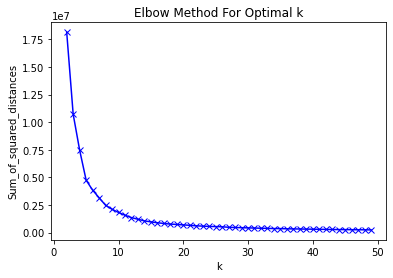

In [13]:
from matplotlib import pyplot as plt  # Import for graphing

# Elbow method for assessing k number of clusters
wcss = [] # Null dataframe to store sum of squared distances
K = range(2, 50)  # Range to assess
for k in K:
    print("Beginning k = " + str(k))
    kmeans_k = KMeans(n_clusters=k).fit(df) # Fitting to k number of clusters
    wcss.append(kmeans_k.inertia_) # Storing data

# Elbow methog graphing
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:

from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

sample_size = 100 # Random sample of 100 points from original dataset

df_sub = dat.iloc[:, 1:].sample(n=sample_size) # Sampling function
df_sub.fillna(-1, inplace=True) # Null value handling same as above

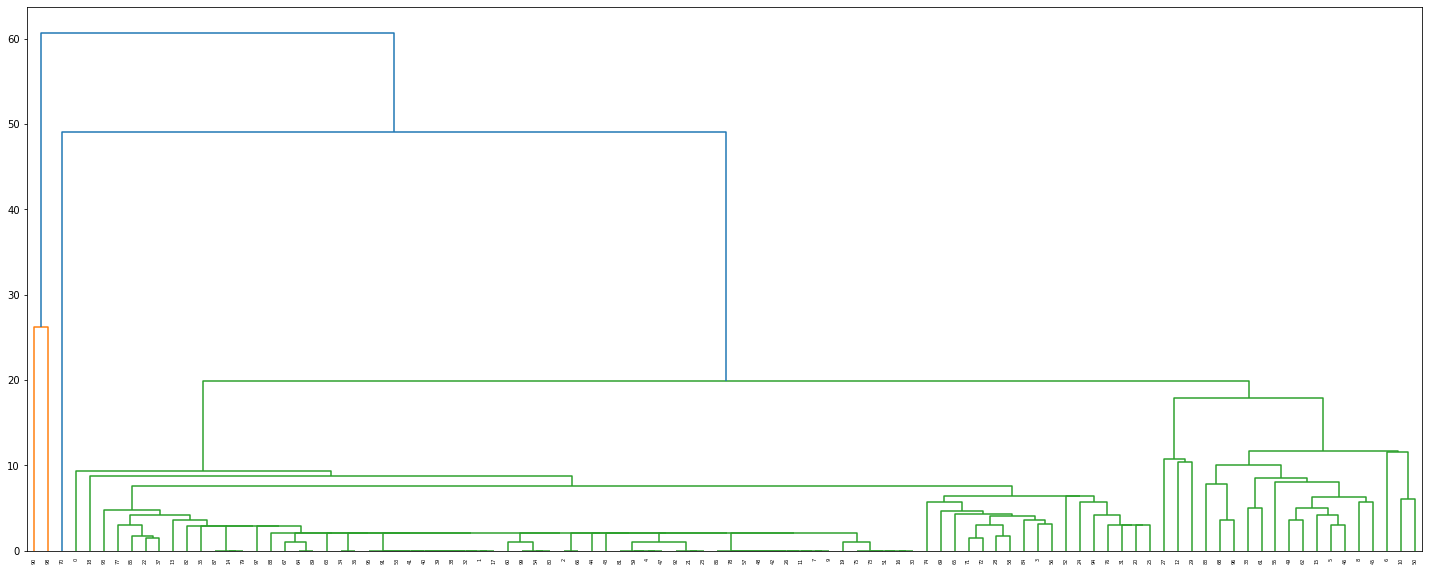

In [16]:
# Euclidean Distance

link_euclidean = hierarchy.linkage(df_sub, method='single', metric='euclidean')

fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(link_euclidean)
plt.show()

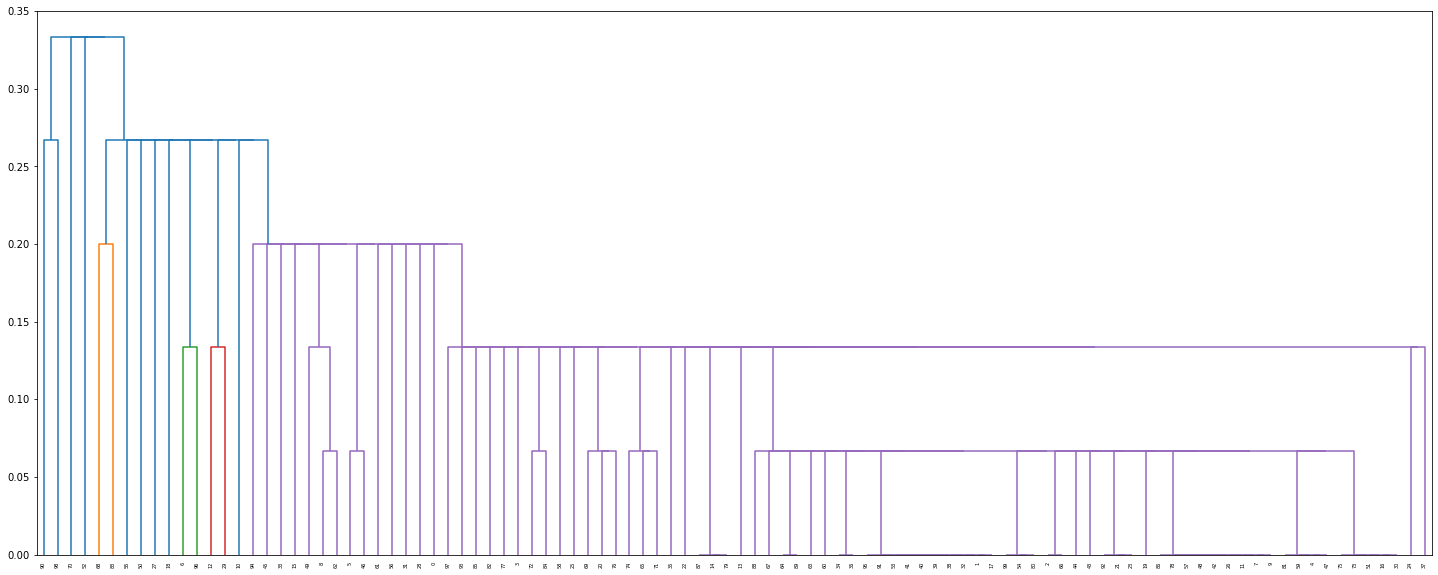

In [17]:
# Repeated call with Hamming distance instead

link_hamming = hierarchy.linkage(df_sub, method='single', metric='hamming')

fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(link_hamming)
plt.show()